In [ ]:
!pip install prov[dot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421 kB 4.9 MB/s 
     |████████████████████████████████| 500 kB 48.4 MB/s 
     |████████████████████████████████| 41 kB 576 kB/s 


In [ ]:
import prov.model as prov
from prov.model import ProvDocument, Namespace, Literal, PROV, Identifier
import datetime
d1 = ProvDocument()  # d1 is now an empty provenance document

In [ ]:
# Declaring namespaces for various prefixes 
d1.add_namespace('prov', 'http://www.w3.org/ns/prov#')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('base', 'http://www.RDorg.it/')
d1.add_namespace('user', 'http://www.RDorg.it/people/')
d1.add_namespace('user_roles','http://www.RDorg.it/roles/')
#Add DCterms namespace
d1.add_namespace('dcterms', 'http://purl.org/dc/terms/')
#Add REPRODUCE-ME
d1.add_namespace('repr', 'https://w3id.org/reproduceme')

<Namespace: repr {https://w3id.org/reproduceme}>

In [ ]:
#Declaring entities
e1 = d1.entity ('base:Sample')
e2 = d1.entity ('base:Registered_sample')
e3 = d1.entity ('base:Libraries_readyforSeq', {'repr:ExperimentMaterial':'repr:DNA'})
e4 = d1.entity ('base:BCL_raw_data', {'prov:type':'repr:RawData'})
e5 = d1.entity ('base:FASTQ_files')
e6 = d1.entity ('base:BAM_file')
e7 = d1.entity ('base:VCF_file')
e8 = d1.entity ('base:Phylogenetic_tree')

In [ ]:
#Protocols described as entity type "plan"
e9 = d1.entity ('base:Sample_sheet', {'prov:type':'Plan',
                                      'prov:label':"Sample Sheet v2 template",
                                      'dcterms:title':"Sample Sheet",
                                      'dcterms:format':"CSV",
                                      'prov:location':"https://support.illumina.com/downloads/sample-sheet-v2-template.html"})
e10 = d1.entity ('base:Library_preaparation_protocol', {'prov:type':'Plan', 
                                                        'prov:label':"Illumina DNA Prep",
                                                        'dcterms:title':"Illumina DNA Prep Reference Guide",
                                                        'dcterms:format':"PDF",
                                                        'prov:location':"https://support.illumina.com/content/dam/illumina-support/documents/documentation/chemistry_documentation/illumina_prep/illumina-dna-prep-reference-guide-1000000025416-10.pdf"})
e11 = d1.entity ('base:cDNA_synthesis_protocol_V2', 
                 {'prov:type':'Plan', 
                  'prov:label':"nCoV-2019 sequencing protocol v2 (GunIt) V.2",
                  'dcterms:format':"PDF", 
                  'prov:location':"https://protocols.io/view/ncov-2019-sequencing-protocol-v2-bdp7i5rn.pdf"})
#The V2 protocol used for cDNA synthesis is a revision of V1 
e24 = d1.entity ('base:cDNA_synthesis_protocol_V1', 
                 {'prov:type':'Plan', 
                  'prov:label':"nCoV-2019 sequencing protocol v1 (GunIt) V.1",
                  'dcterms:format':"PDF", 
                  'prov:location':"https://www.protocols.io/view/ncov-2019-sequencing-protocol-bbmuik6w.pdf"})
d1.wasRevisionOf (e11, e24)

<ProvDerivation: (base:cDNA_synthesis_protocol_V2, base:cDNA_synthesis_protocol_V1)>

In [ ]:
#The raw data and FASTQ storages are prov "Collection" type
e22 = d1.entity ('base:Raw_data_database', {'prov:type':'prov:Collection'})
e23 = d1.entity ('base:FASTQ_database', {'prov:type':'prov:Collection'})
d1.hadMember (e22, e4)
d1.hadMember (e23, e5)

<ProvMembership: (base:FASTQ_database, base:FASTQ_files)>

In [ ]:
#Declaring agents
ag1 = d1.agent ('user:Research_center', {'prov:type':'Organization', 'foaf:name':"CRS4"})
ag2 = d1.agent ('user:Service_requesting_user', {'prov:type':'Organization'})
ag3 = d1.agent ('user:Operator_1', {'prov:type':'Person', 'prov:role':'NGS laboratory operator'})
ag4 = d1.agent ('user:Operator_2', {'prov:type':'Person', 'prov:role':'Bioinformatics laboratory operator'})
d1.actedOnBehalfOf (ag1, ag2)
d1.actedOnBehalfOf (ag3, ag1)
d1.actedOnBehalfOf (ag4, ag1)

<ProvDelegation: (user:Operator_2, user:Research_center)>

In [ ]:
a1 = d1.activity ('base:Sample_registration')
a2 = d1.activity ('base:Sample_processing')
a3 = d1.activity ('base:Sample_sheet_preparation')
a4 = d1.activity ('base:Sequencing')
a5 = d1.activity ('base:BCL_storage')
a6 = d1.activity ('base:Primary_sequencing_analysis')
a7 = d1.activity ('base:FASTQ_storage')
a8 = d1.activity ('base:Secondary_analysis')
a9 = d1.activity ('base:Tertiary_analysis')

d1.wasInformedBy (a6, a4)
d1.wasInformedBy (a8, a6)
d1.wasInformedBy (a9, a8)

<ProvCommunication: (base:Tertiary_analysis, base:Secondary_analysis)>

In [ ]:
#Declaring usage
d1.used (a1, e1)
d1.used (a2, e2)
d1.used (a4, e3)
d1.used (a4, e9)
d1.used (a5, e4)
d1.used (a6, e4)
d1.used (a7, e5)
d1.used (a8, e5)
d1.used (a8, e6) 
d1.used (a9, e5)
d1.used (a2, e10)
d1.used (a2, e11)

<ProvUsage: (base:Sample_processing, base:cDNA_synthesis_protocol_V2)>

In [ ]:
#Declaring generation
d1.wasGeneratedBy (e2, a1)
d1.wasGeneratedBy (e3, a2)
d1.wasGeneratedBy (e4, a4)
d1.wasGeneratedBy (e5, a6)
d1.wasGeneratedBy (e9, a3)
d1.wasGeneratedBy (e6, a8)
d1.wasGeneratedBy (e7, a8)
d1.wasGeneratedBy (e8, a9)
d1.wasGeneratedBy (e22, a5)
d1.wasGeneratedBy (e23, a7)

<ProvGeneration: (base:FASTQ_database, base:FASTQ_storage)>

In [ ]:
#Declaring association
d1.wasAssociatedWith (a1, ag3)
d1.wasAssociatedWith (a2, ag3)
d1.wasAssociatedWith (a3, ag3)
d1.wasAssociatedWith (a4, ag3)
d1.wasAssociatedWith (a5, ag3)
d1.wasAssociatedWith (a6, ag4)
d1.wasAssociatedWith (a7, ag4)
d1.wasAssociatedWith (a8, ag4)
d1.wasAssociatedWith (a9, ag4)

<ProvAssociation: (base:Tertiary_analysis, user:Operator_2)>

In [ ]:
#Declaring attribution
d1.wasAttributedTo (e1, ag2)
d1.wasAttributedTo (e2, ag3)
d1.wasAttributedTo (e3, ag3)
d1.wasAttributedTo (e4, ag3)
d1.wasAttributedTo (e9, ag3)
d1.wasAttributedTo (e6, ag4)
d1.wasAttributedTo (e7, ag4)
d1.wasAttributedTo (e8, ag4)
d1.wasAttributedTo (e22, ag4)
d1.wasAttributedTo (e23, ag4)

<ProvAttribution: (base:FASTQ_database, user:Operator_2)>

In [ ]:
#Declaring derivation
d1.wasDerivedFrom (e5, e4)
d1.wasDerivedFrom (e6, e5)
d1.wasDerivedFrom (e7, e6)
d1.wasDerivedFrom (e8, e6)


<ProvDerivation: (base:Phylogenetic_tree, base:BAM_file)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('CovidtrackingBase.png')

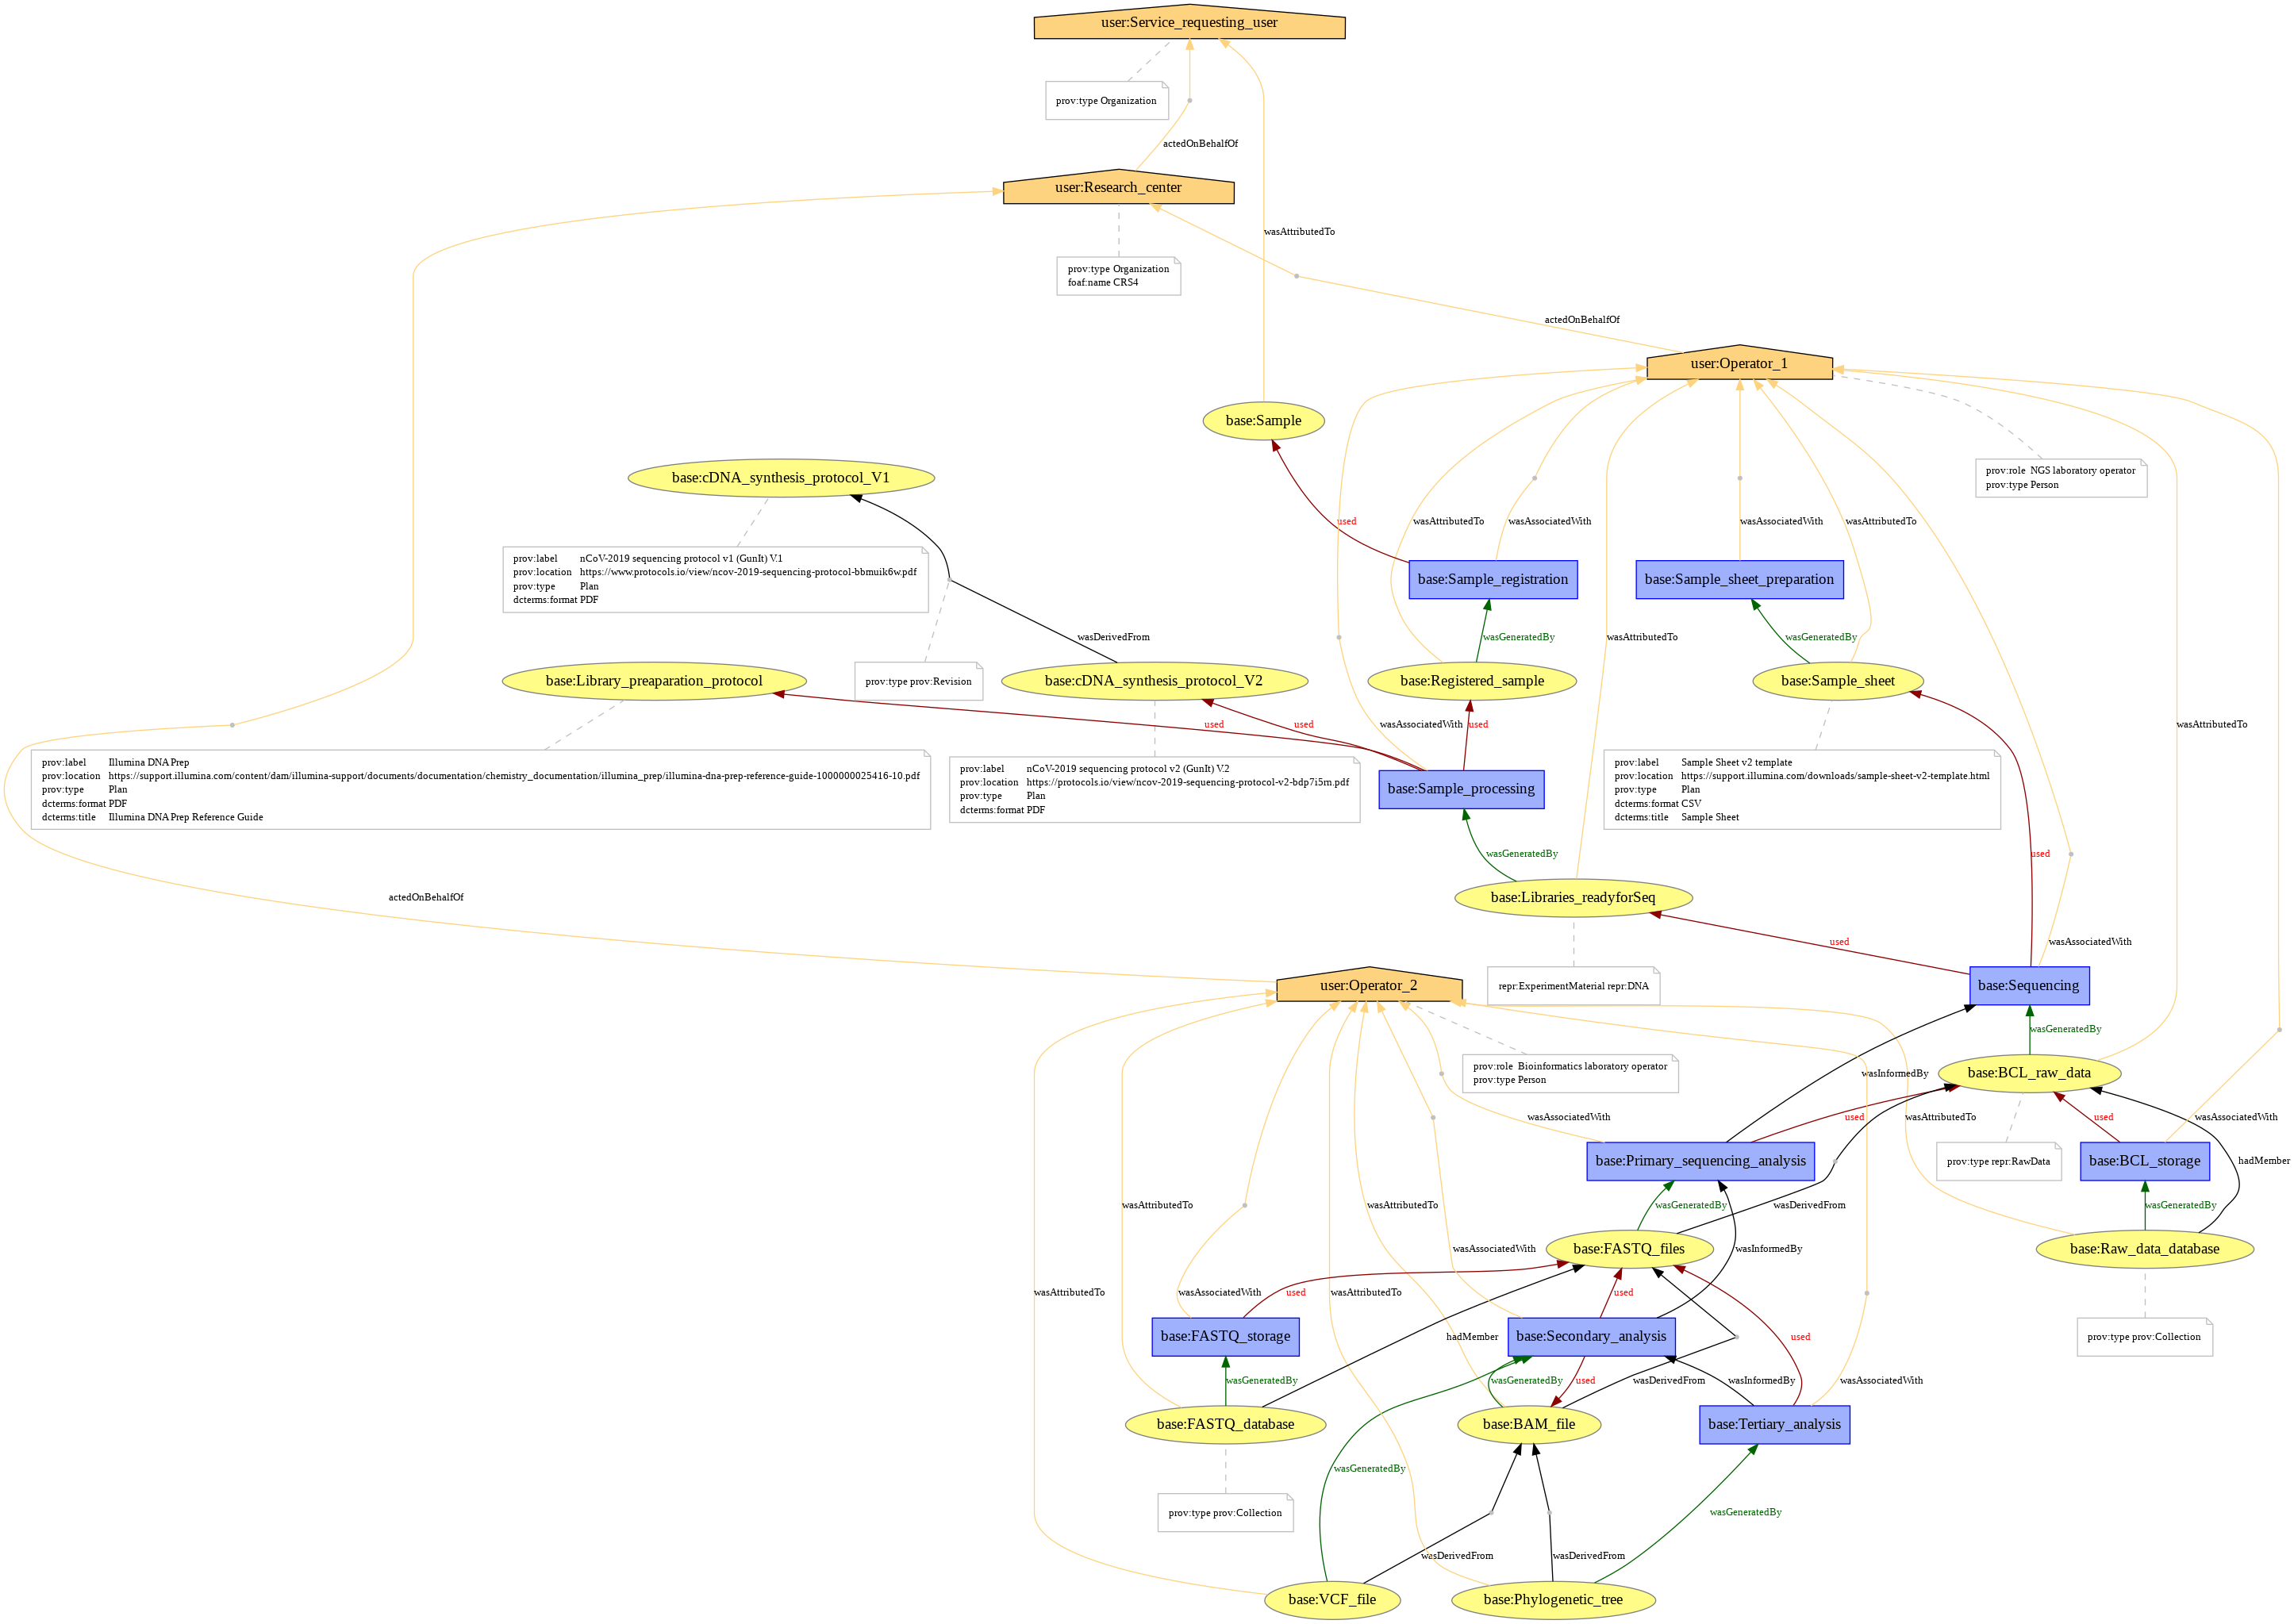

In [ ]:
# visualize the image
from IPython.display import Image 
Image('CovidtrackingBase.png')

In [ ]:
#Declaring subactivities
a10 = d1.activity ('base:cDNA_synthesis')
a11 = d1.activity ('base:Libraries_preparation')
a12 = d1.activity ('base:Quantity_and_quality_check')
a2 = d1.activity('base:Sample_processing', other_attributes={'dcterms:hasPart': (a10, a11, a12)})


In [ ]:
#Declaring entities exchanged by subactivities
e12 = d1.entity ('base:Extracted_RNA', {'repr:ExperimentMaterial':'repr:cDNASource'})
e13 = d1.entity ('base:Synthesized_cDNA')
e14 = d1.entity ('base:Libraries(pre-check)')
e15 = d1.entity ('base:Libraries(post-check)')


In [ ]:
#Declaring specialization for entities
d1.specializationOf (e12, e2)
d1.specializationOf (e15, e3)


<ProvSpecialization: (base:Libraries(post-check), base:Libraries_readyforSeq)>

In [ ]:
#Declaring usage in sub-activities
d1.used (a10, e11)
d1.used (a10, e12)
d1.used (a11, e13)
d1.used (a12, e14)
d1.used (a12, e11)
d1.used (a11, e10)

<ProvUsage: (base:Libraries_preparation, base:Library_preaparation_protocol)>

In [ ]:
#Declaring generation in sub-activities
d1.wasGeneratedBy (e13, a10)
d1.wasGeneratedBy (e14, a11)
d1.wasGeneratedBy (e15, a12)

<ProvGeneration: (base:Libraries(post-check), base:Quantity_and_quality_check)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('Covidtracking_subactivities.png')

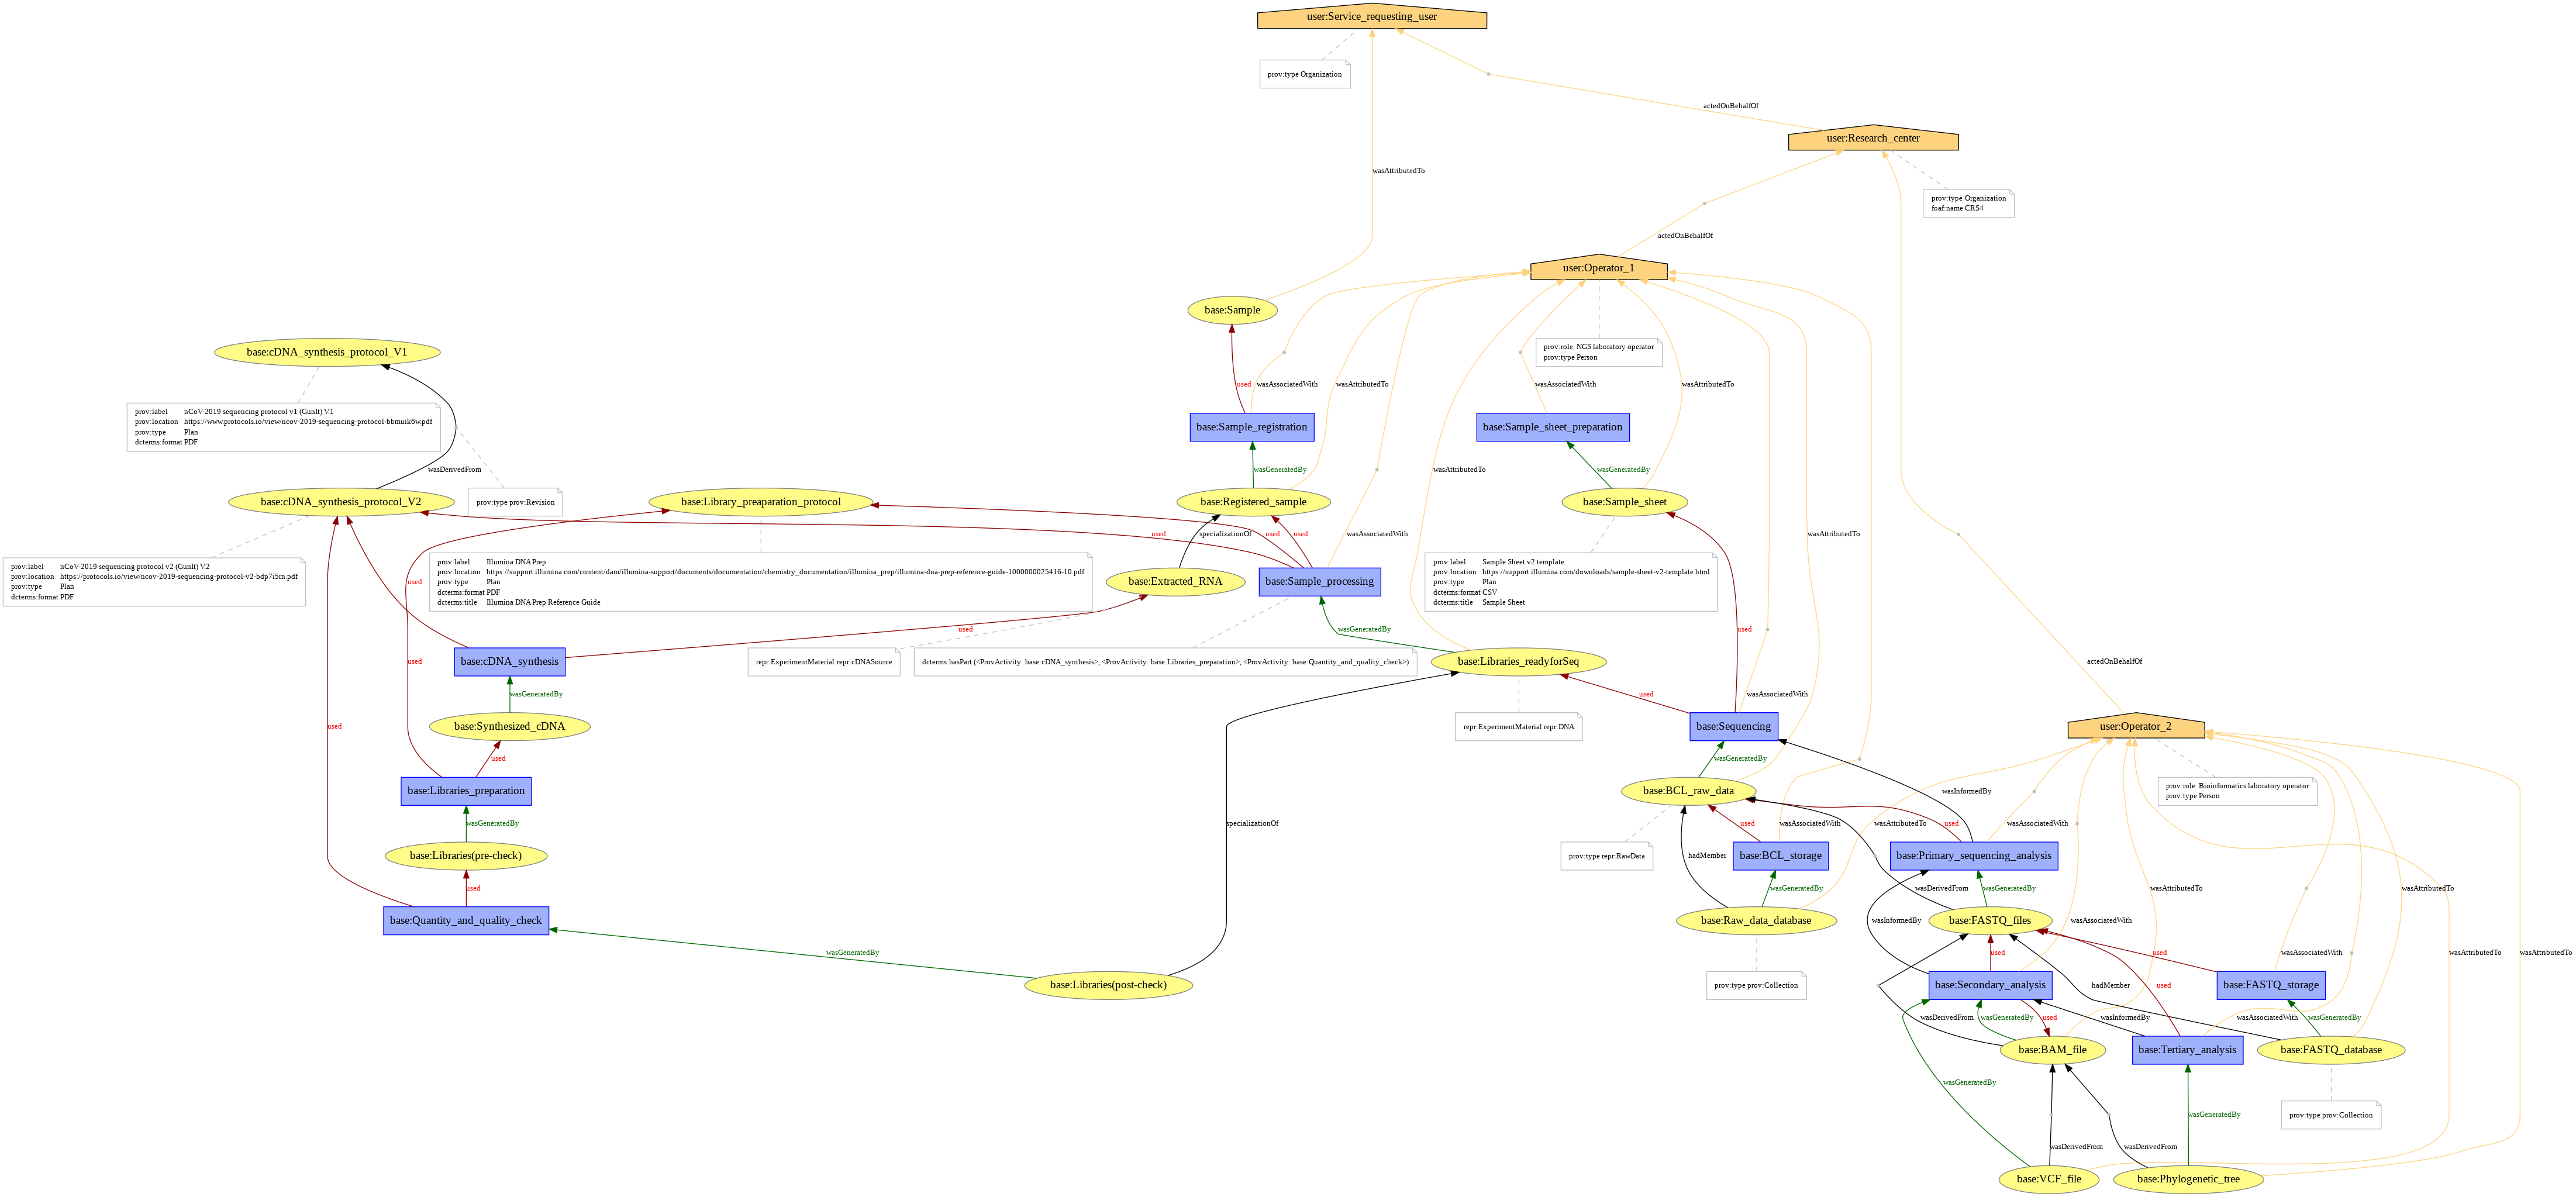

In [ ]:
# visualize the image
from IPython.display import Image 
Image('Covidtracking_subactivities.png')

In [ ]:
#Declaring subactivities
a13 = d1.activity ('base:DNA_tagmentation')
a14 = d1.activity ('base:Post-tagmentation_clean-up')
a15 = d1.activity ('base:Tagmented_DNA_amplification')
a16 = d1.activity ('base:Libraries_clean-up')
a17 = d1.activity ('base:Libraries_pooling')
a11 = d1.activity('base:Libraries_preparation', other_attributes={'dcterms:hasPart': (a13, a14, a15, a16, a17)})
#Declaring entities
e16 = d1.entity ('base:cDNA_ready_for_tagmentation')
e17 = d1.entity ('base:Tagmented_DNA')
e18 = d1.entity ('base:Cleaned_up_tagmented_DNA')
e19 = d1.entity ('base:Amplified_tagemented_DNA')
e20 = d1.entity ('base:Cleaned_up_libraries')
e21 = d1.entity ('base:Pooled_libraries')
#Declaring specialization
d1.specializationOf (e16, e13)
d1.specializationOf (e21, e14)
#Declaring usage
d1.used (a13, e16)
d1.used (a14, e17)
d1.used (a15, e18)
d1.used (a16, e19)
d1.used (a17, e20)
#Declaring generation
d1.wasGeneratedBy (e17, a13)
d1.wasGeneratedBy (e18, a14)
d1.wasGeneratedBy (e19, a15)
d1.wasGeneratedBy (e20, a16)
d1.wasGeneratedBy (e21, a17)

<ProvGeneration: (base:Pooled_libraries, base:Libraries_pooling)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('seconditeration_Covidtracking_subactivities.png')

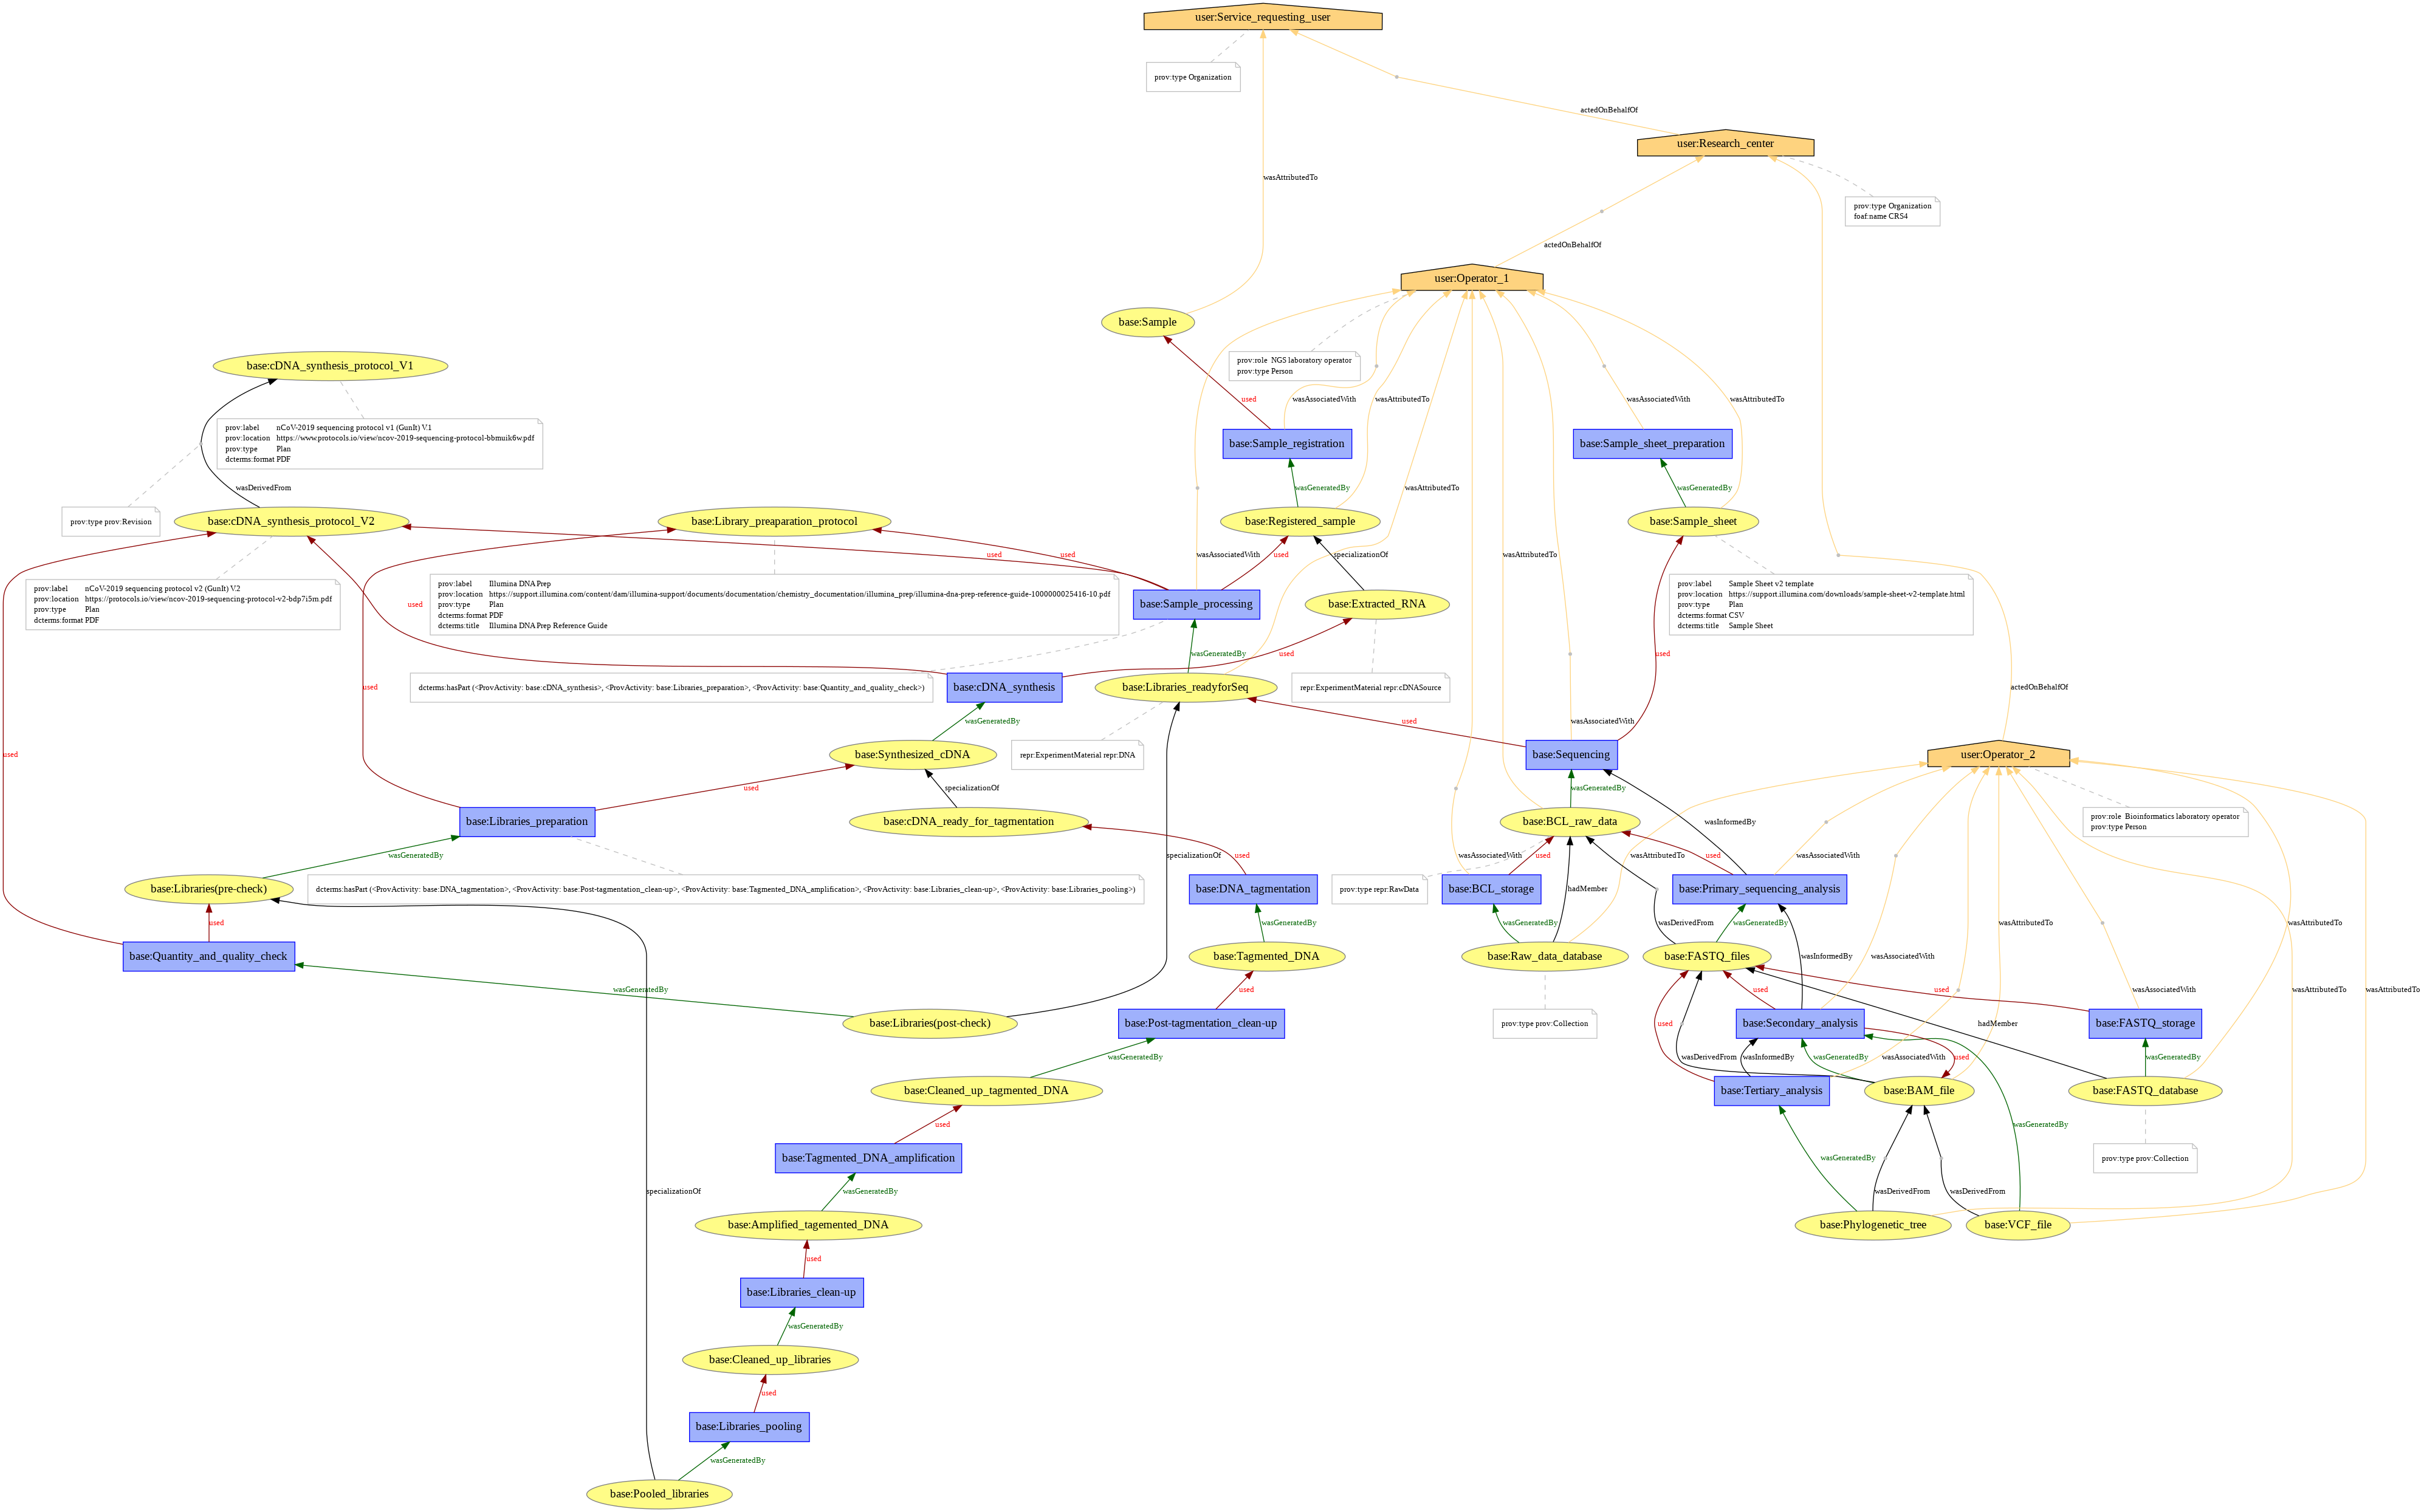

In [ ]:
# visualize the image
from IPython.display import Image 
Image('seconditeration_Covidtracking_subactivities.png')

In [ ]:
print(d1.get_provn())

document
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix base <http://www.RDorg.it/>
  prefix user <http://www.RDorg.it/people/>
  prefix user_roles <http://www.RDorg.it/roles/>
  prefix dcterms <http://purl.org/dc/terms/>
  prefix repr <https://w3id.org/reproduceme>
  
  entity(base:Sample)
  entity(base:Registered_sample)
  entity(base:Libraries_readyforSeq, [repr:ExperimentMaterial="repr:DNA"])
  entity(base:BCL_raw_data, [prov:type="repr:RawData"])
  entity(base:FASTQ_files)
  entity(base:BAM_file)
  entity(base:VCF_file)
  entity(base:Phylogenetic_tree)
  entity(base:Sample_sheet, [prov:type="Plan", prov:label="Sample Sheet v2 template", dcterms:title="Sample Sheet", dcterms:format="CSV", prov:location="https://support.illumina.com/downloads/sample-sheet-v2-template.html"])
  entity(base:Library_preaparation_protocol, [prov:type="Plan", prov:label="Illumina DNA Prep", dcterms:title="Illumina DNA Prep Reference Guide", dcterms:format="PDF", prov:location="https://support.illumi

In [ ]:
#Turtle (PROV-O)
d1.serialize('Covidtracking_subactivities.ttl', format='rdf', rdf_format='ttl')

In [ ]:
#XML (PROV-XML)
d1.serialize('Covidtracking_subactivities.xml', format='xml')